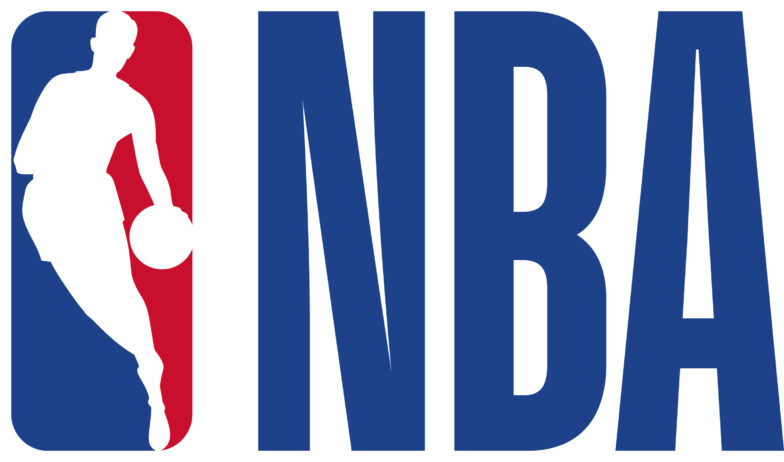

The National Basketball Association is the premier men's professional basketball league globally. It is based in North America, with 29 teams being from the United States and 1 team being from Canada.

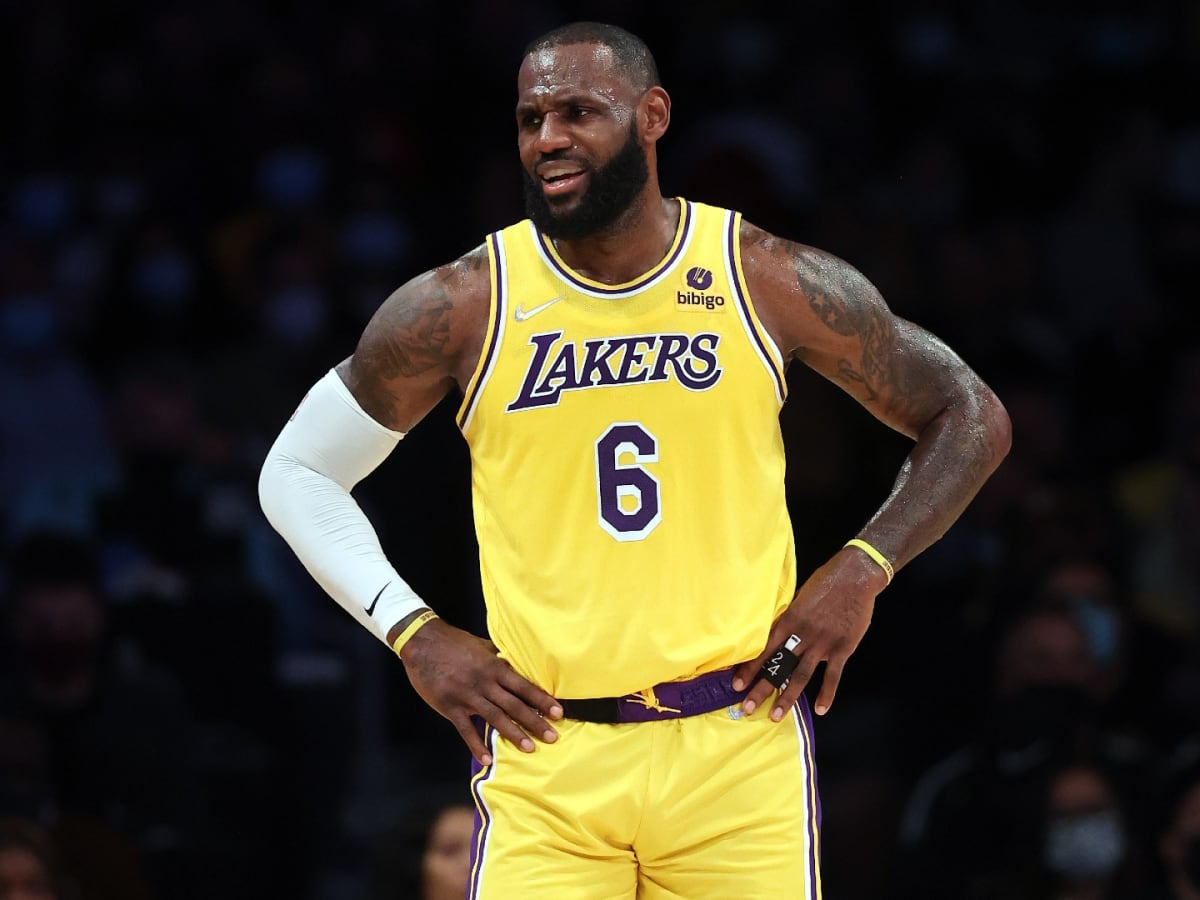

LeBron James, an NBA player in the Los Angeles Lakers, is widely considered to be one of the greatest basketball players of all time.

The data set I am researching consists of the stats of NBA players between the 1997 to 2021 seasons. I chose this for my project because I play basketball and I am familiar with the statistical terms used in the data set. Such player stats (per season) include name, team, age, height, weight, college attended, country (in which they were born), draft year, draft round, draft number, points, games played, average points, average rebounds, average assists, net rating, offensive rebound percentage, defensive rebound percentage, usage rate, shooting efficiency, assist percentage, and season. Many of these nominal values pertain to the player's background (college, country, etc.) while others are game statistics (points, assists, etc.).

This dataset was taken from Kaggle (https://www.kaggle.com/datasets/justinas/nba-players-data).

In [238]:
# These are the imports used in this notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from matplotlib import cm
sns.set()
%matplotlib inline

Why I chose this project:


In [239]:
# This reads the dataset all_seasons.csv into a DataFrame called players.
players = pd.read_csv('./data/all_seasons.csv', sep=',')

In [240]:
# As a "sample" of the data set, this table presents the stats of the first 15 players listed in the DataFrame.
# They played in the 1996-1997 season.
players.head(15)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22,213.36,106.594120,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29,210.82,111.130040,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22,205.74,106.594120,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
5,Martin Lewis,TOR,22,198.12,102.058200,Seward County Community College,USA,1995,2,50,...,1.6,0.7,0.4,-3.5,0.087,0.045,0.135,0.470,0.125,1996-97
6,Mark West,CLE,36,208.28,111.583632,Old Dominion,USA,1983,2,30,...,3.2,2.7,0.3,3.5,0.092,0.146,0.137,0.555,0.034,1996-97
7,Mark Strickland,MIA,26,208.28,99.790240,Temple,USA,Undrafted,Undrafted,Undrafted,...,2.0,1.2,0.0,-17.1,0.109,0.152,0.232,0.448,0.013,1996-97
8,Mark Price,GSW,33,182.88,81.646560,Georgia Tech,USA,1986,2,25,...,11.3,2.6,4.9,-3.1,0.023,0.088,0.192,0.597,0.289,1996-97
9,Mark Jackson,IND,32,190.50,83.914520,St. John's (NY),USA,1987,1,18,...,9.9,4.8,11.4,-2.0,0.035,0.116,0.155,0.525,0.464,1996-97


### Research Question #1: What is the correlation between player height and the average number of rebounds grabbed?

In [241]:
# This code generates a table consisting of the pairwise correlation of all columns in the DataFrame.
players.corr()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,-0.011678,0.052119,0.049585,0.002873,0.031416,0.086853,0.096820,-0.060633,0.014843,-0.127949,0.022131,0.066615
player_height,-0.011678,1.000000,0.827301,-0.005329,-0.060524,0.422356,-0.457367,-0.008723,0.590928,0.615384,-0.109527,0.069618,-0.625888
player_weight,0.052119,0.827301,1.000000,0.012496,-0.030655,0.437403,-0.387343,0.000612,0.604062,0.607750,-0.071879,0.062474,-0.540902
gp,0.049585,-0.005329,0.012496,1.000000,0.538367,0.468870,0.385596,0.254051,-0.020495,0.060785,0.138849,0.377679,0.134810
pts,0.002873,-0.060524,-0.030655,0.538367,1.000000,0.622818,0.656564,0.221002,-0.124345,0.050246,0.638037,0.378961,0.330269
reb,0.031416,0.422356,0.437403,0.468870,0.622818,1.000000,0.231678,0.193027,0.410619,0.611215,0.225592,0.312843,-0.078836
ast,0.086853,-0.457367,-0.387343,0.385596,0.656564,0.231678,1.000000,0.167207,-0.346569,-0.207846,0.387400,0.177817,0.806682
net_rating,0.096820,-0.008723,0.000612,0.254051,0.221002,0.193027,0.167207,1.000000,0.056778,0.043275,0.000476,0.318076,0.061723
oreb_pct,-0.060633,0.590928,0.604062,-0.020495,-0.124345,0.410619,-0.346569,0.056778,1.000000,0.557682,-0.101293,0.058805,-0.438385
dreb_pct,0.014843,0.615384,0.607750,0.060785,0.050246,0.611215,-0.207846,0.043275,0.557682,1.000000,-0.021448,0.102571,-0.338098


<AxesSubplot:>

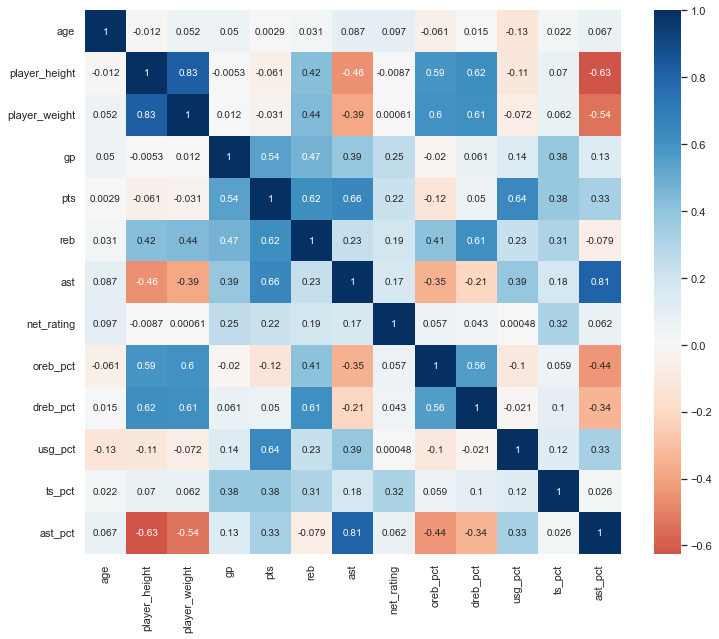

In [242]:
# This generates a full correlation matrix consisting of the same values as above but in figure form.
plt.figure(figsize=(12,10))
sns.heatmap(players.corr(), cmap=cm.RdBu, annot=True, center=0)

According to the correlation table and the correlation matrix above, the Pearson's Correlation Coefficient, also referred to as Pearson's _r_, is 0.42. __This means that the correlation between a player's height and a player's average number of rebounds is positive and weak__. In other words, the linear relationship between the two values of each player is generally positive and statistically weak, with player height somewhat increasing with average number of rebounds.

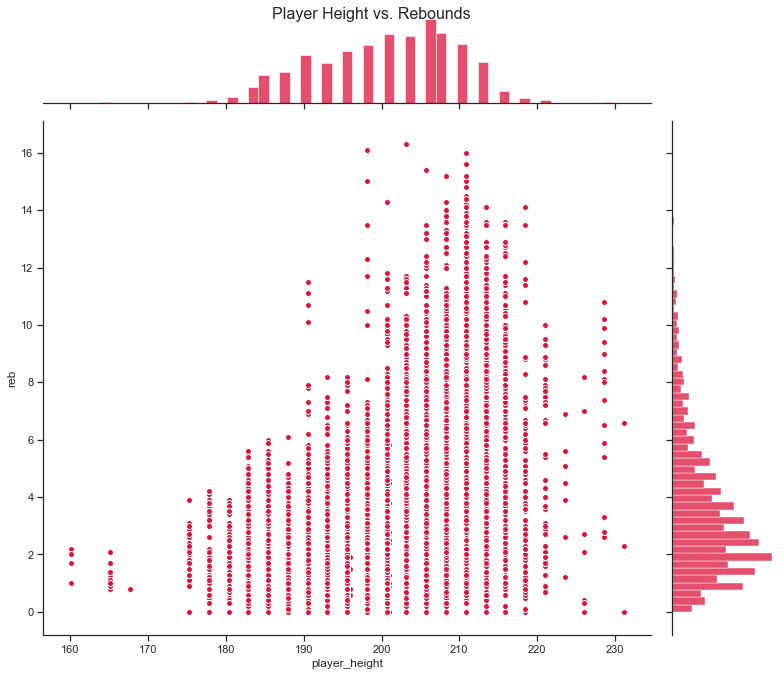

In [243]:
# This joint plot displays both of the respective distributions of player height and rebounds, as well as their collective
# "scatterplot."
sns.set_theme(style="ticks")
player_height_and_reb = sns.jointplot(data=players, x='player_height', y='reb', color='crimson', linewidth=1)
player_height_and_reb.figure.suptitle('Player Height vs. Rebounds', fontsize=16)
player_height_and_reb.fig.set_figwidth(12)
player_height_and_reb.fig.set_figheight(10)

The joint plot above reveals that even taller players end up making low amounts of rebounds, which tampers with the correlation between the two stats. _Other than that_, there is generally a positive linear relationship between the two, as can be seen in the graph.

### Research Question #2: Is there correlation between a player's average points scored in a game and their number of rebounds/assists?

The three stats basketball players are generally evaluated on are points, rebounds, and assists, with points being the most significant stat. This begs the question: Can the number of average points scored by an NBA player in a game be used as a general metric connected to rebounds and assists? This is not the same as analyzing the correlation coefficients of one stats with two stats separately; think of it as a three-way variable correlation where one stat is collectively affected by two. According to [ScienceDirect.com](https://www.sciencedirect.com/topics/mathematics/multiple-correlation-coefficient), "__A multiple correlation coefficient (_R_) yields the maximum degree of [linear] relationship that can be obtained between two or more independent variables and a single dependent variable.__" Given that the NBA players within the dataset are a sample of all NBA players, this can be seen as a nearly "fundamental" relationship between stats of all NBA players, the top basketball players in the world, if true.
   
In order to calculate such a relationship, one must use the following equation [(Source)](http://www.real-statistics.com/correlation/multiple-correlation): 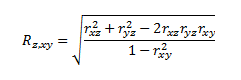

For an unbiased estimate (in terms of sample size) of the relationship, one may use the equation below to find the adjusted multiple coefficient of determination. The multiple coefficient of determination is generally written as R-squared (R^2), which is a statistical value that represents the proportion of the variance for a dependent variable that is explained by an independent variable or variables in a regression model.
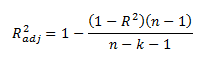
When programmed in Python, these equations can be adapted to the code below:

In [244]:
# Pairwise correlation coefficients
cor = players.corr()

# Independent variables
x = 'reb'
y = 'ast'

# Dependent variable
z = 'pts'

# Pairings
xz = cor.loc[ x, z ]
yz = cor.loc[ y, z ]
xy = cor.loc[ x, y ]

# Multiple correlation coefficient equation
Rxyz = math.sqrt((abs(xz**2) + abs(yz**2) - 2*xz*yz*xy) / (1-abs(xy**2)))
R2 = Rxyz**2

# Calculate adjusted R-squared
n = len(players) # Number of rows
k = 2 # Number of independent variables
R2_adj = 1 - ( ((1-R2)*(n-1)) / (n-k-1) )
R2_adj

0.6651506615856961

From this, the adjusted R-squared value is about 0.665, meaning that 66.5% of the variability observed in the target variable is explained by the regression model. With this generally high value representing the strength of the relationship between points and rebounds/assists, __there exists a moderately significant correlation between a player's average points scored in a game and their number of rebounds/assists__.

For reference of the correlation between each of the stats individually, a heatmap is shown below:

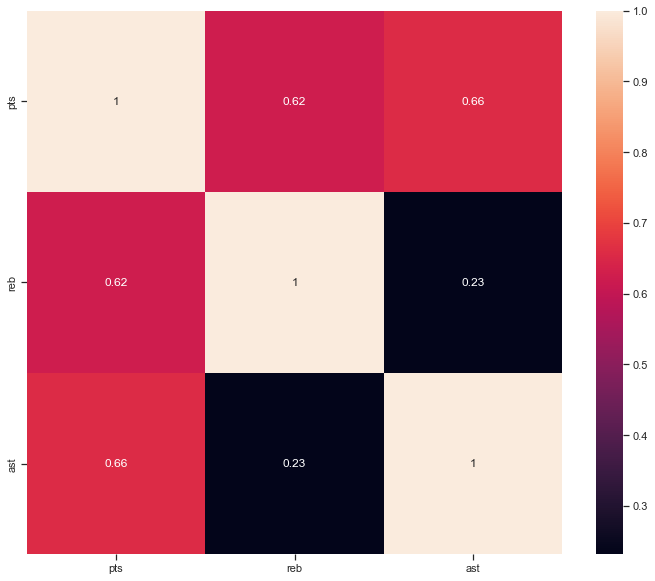

In [245]:
# This heatmap depicts the coefficients of correlation between a player's average points, average rebounds,
# and average assists in a game.
pts_reb_ast = pd.DataFrame(players, columns=['pts','reb','ast'])
plt.figure(figsize=(12,10))
corrMatrix = pts_reb_ast.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Research Question #3: Which countries represented by players in the NBA yield the highest-scoring players on average?

In [246]:
# This table depicts the average points scored by NBA players from each respective country, stored as
# highest_scoring_countries. Those shown are the top 15 countries in that respect.
highest_scoring_countries = players[['country','pts']].groupby('country').mean()
highest_scoring_countries.sort_values(by='pts', ascending=False).head(15)

,pts
country,
Bahamas,16.187500
US Virgin Islands,15.138710
Republic of the Congo,13.250000
Germany,12.643137
United Kingdom,12.205000
Cameroon,12.095455
Serbia and Montenegro,11.969697
Finland,11.900000
Italy,11.740000


<AxesSubplot:title={'center':'Average Points Scored by Country'}, ylabel='country'>

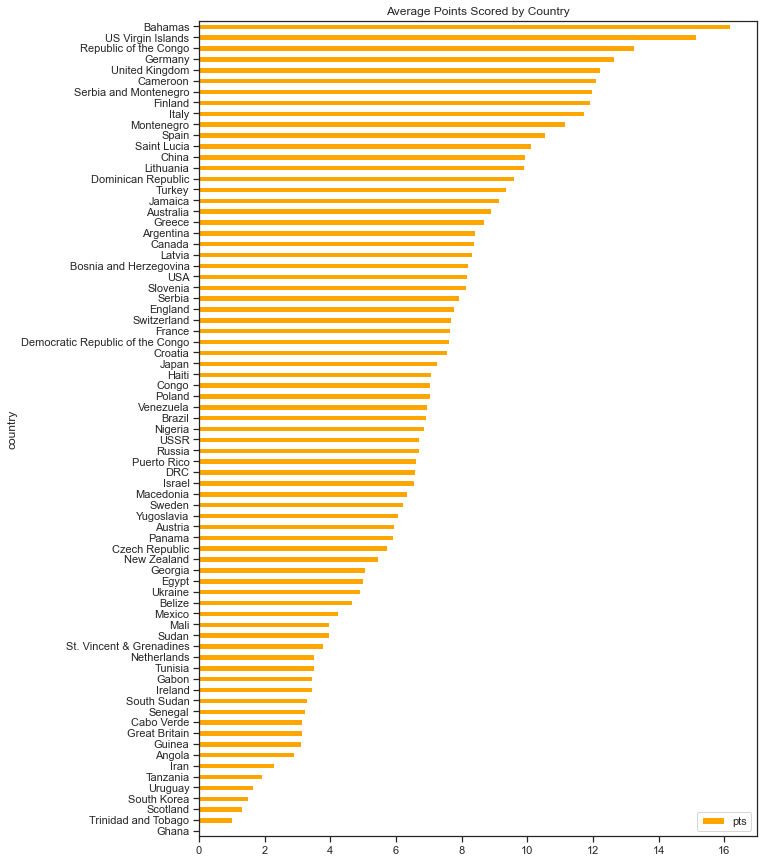

In [247]:
# This bar graph illustrates highest_scoring_countries as an ordered graph, from highest to lowest average points 
# scored by players from the country. All countries represented by players from the NBA from 1996 to 2021 are shown.
highest_scoring_countries_sort = highest_scoring_countries.sort_values('pts')
highest_scoring_countries_sort.plot(kind="barh", figsize=(10,15), color='orange', title='Average Points Scored by Country', fontsize=11)

From the data, it can be seen that __players from the Bahamas score the highest on average compared to those of all other countries represented in the NBA__. Their average points scored is about 16.2 points per game.

In [248]:
# This calculates the total percentage of players from the Bahamas in the NBA from 1996 to 2021.
bahamas_count = len(players[players['country']=='Bahamas'])
percent_bahamas_count = bahamas_count / len(players) * 100
percent_bahamas_count

0.06837606837606838

The code above reveals that only approximately 0.068% of all players represented were from the Bahamas, which suggests that the fact that are and were very few players in the NBA from the Bahamas makes the sample size too small to make any generalizations regarding the topic of the country with the best players. To put the imbalance of country representation into perspective, a pie chart consisting of only the top 15 countries represented and their respective proportions to one another is shown below:

<AxesSubplot:title={'center':'Top 15 Countries Represented in the NBA by Number of Players'}, ylabel='country'>

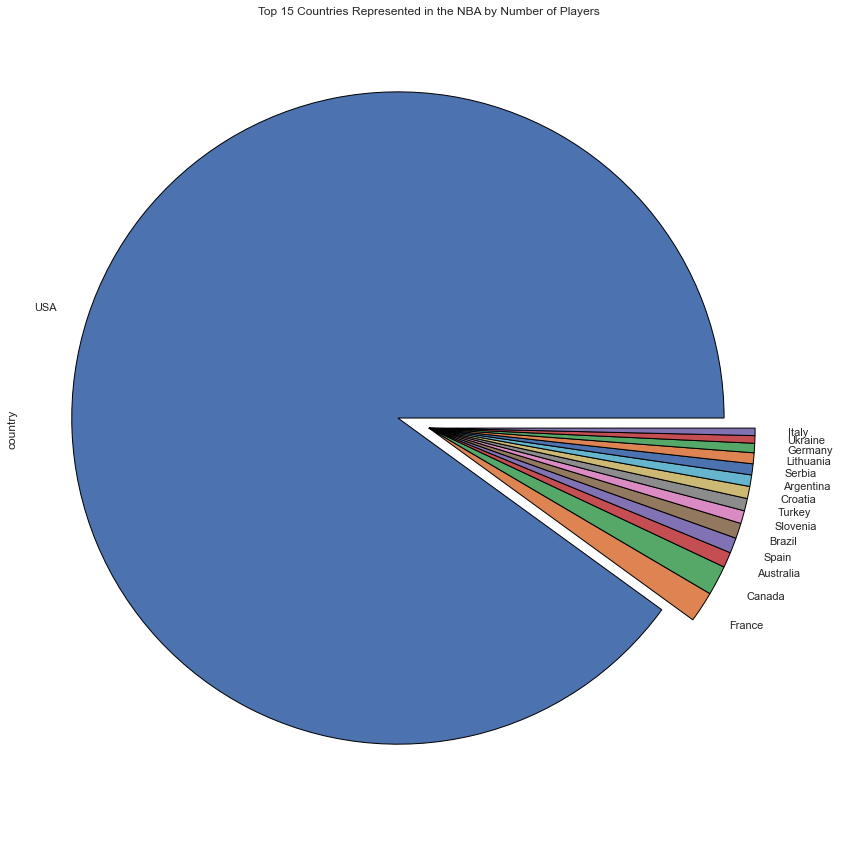

In [249]:
# This is a pie chart consisting of the top 15 countries represented in the NBA, by number of players.
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
players['country'].value_counts()[:15].plot(kind="pie", explode=explode, figsize=(15,15), wedgeprops={'edgecolor': 'black'}
                                           , title='Top 15 Countries Represented in the NBA by Number of Players')

### Research Question #4: What age is the average peak of a player in terms of shooting efficiency?

In [250]:
# This code generates a table listing the mean shooting efficiencies of players in the NBA, sorted by their age. 
avg_peak_shooting = players.groupby('age').agg({'ts_pct':['mean']})
avg_peak_shooting

,ts_pct
,mean
age,
18,0.477333
19,0.491701
20,0.500758
21,0.504849
22,0.504320
23,0.503080
24,0.502825
25,0.507433


__The age that shows the average peak of a player in the NBA in terms of shooting efficiency is 41__. Such a relatively old age for NBA players performing the best in this respect can be explained by the fact that older players tend to play more "mechanically," relying on instinct, efficiency, and foundational skills like shot accuracy honed over the years rather than speed and athletic ability, which younger players excel at. Additionally, most players retire by 36 to 39 years of age, with only 27 out of all (approximately) 4,000 players who played in the NBA having continued playing in their forties. [(Source)](https://sportblurb.com/average-retirement-age-for-an-nba-player/). Thus, most veteran players are skilled enough to justify staying in the league, resulting in a proportionally higher amount of phenomenal players being over 40. Some examples of such brilliant players include Michael Jordan, Kareem Abdul-Jabbar, Karl Malone, and Dirk Nowitski.

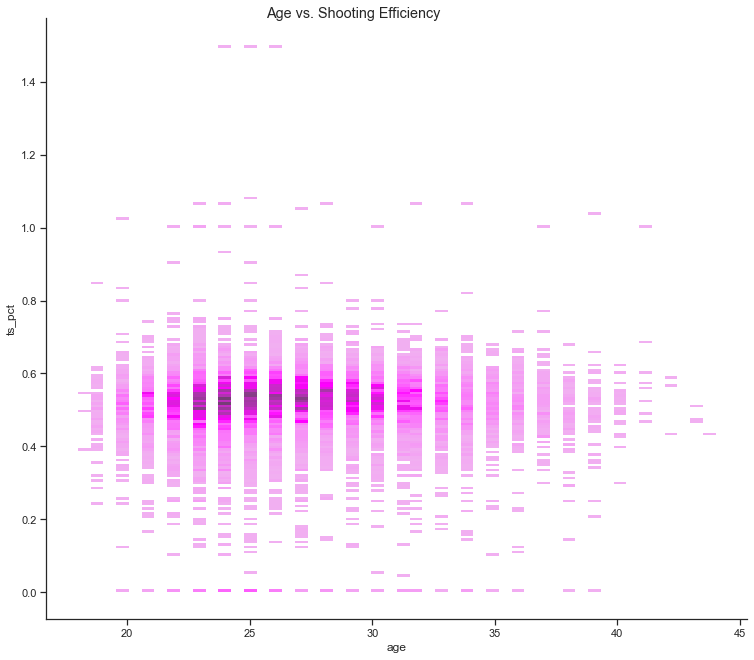

In [251]:
# This graph shows the distribution of age among players in the NBA, as well as their corresponding shooting efficiencies. 
age_by_ts_pct = sns.displot(data=players, x='age', y='ts_pct', color='magenta')
age_by_ts_pct.fig.suptitle('Age vs. Shooting Efficiency')
age_by_ts_pct.fig.set_figwidth(12)
age_by_ts_pct.fig.set_figheight(10)

Clearly, most players tend to be around their mid-twenties to early-thirties. Players aged 40 and above visibly 
have more centralizied and balanced shooting efficiencies, illustrating their experience and skill at shooting a basketball.

### Research Question #5: Which NBA season between 1996 and 2021 presented the tallest players on average?

In [252]:
# This table gives the mean player height for each season between 1996 and 2021, stored as the
# DataFrame avg_height_by_season.
avg_height_by_season = players.groupby('season').agg({'player_height':['mean']})
avg_height_by_season

,player_height
,mean
season,
1996-97,200.994830
1997-98,200.619499
1998-99,200.903007
1999-00,200.920959
2000-01,200.752154
2001-02,201.017909
2002-03,201.520514
2003-04,201.315113


__The 2002-2003 NBA season presented the highest mean player height__, which was about 201.52 centimeters or 6 feet and 7.3 inches, among all of the NBA seasons. This an interesting result, as, despite the fact that people are slowly getting taller on average as time goes on, the tallest players were mostly present in the 2000s. On top of that, players have gotten about 1.5 centimeters shorter on average since 2019. I believe this may be a result of the openness and popularity of the NBA nowadays, since a more varying range of players in terms of height are recruited for teams now when compared to back then. This may be attributed to the rising popularity of the three-point shot in the past decade, which placed more emphasis on player skill rather than player height [(Source)](https://shottracker.com/articles/the-3-point-revolution).

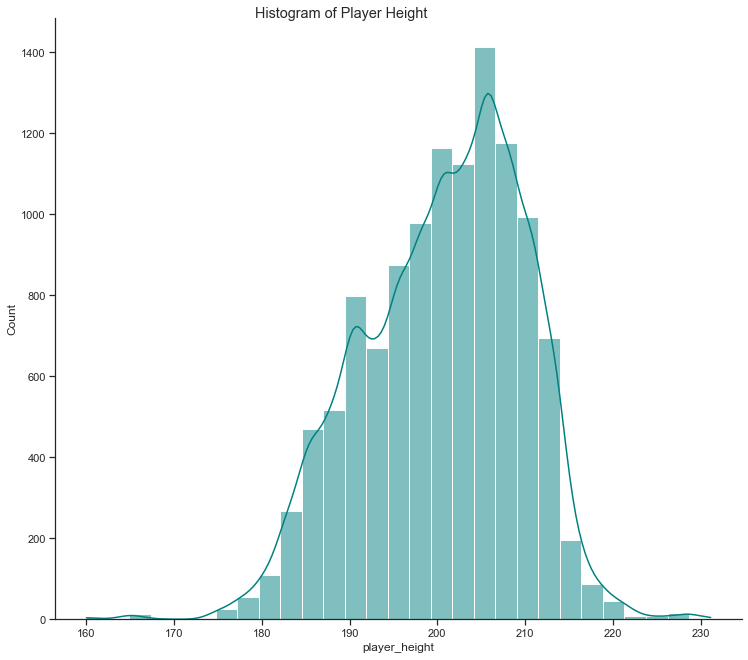

In [253]:
# This histogram displays the distribution and frequencies of player heights across the 1996 to 2021 seasons.
player_height_dist = sns.displot(players['player_height'], bins=29, color='teal', kde=True)
player_height_dist.fig.suptitle('Histogram of Player Height')
player_height_dist.fig.set_figwidth(12)
player_height_dist.fig.set_figheight(10)

Evidently, heights around 200 are the most common among all NBA players (as seen in the histogram), which was consistent throughout all of the seasons represented.

### Research Question #6: Which college had the highest number of first-round draft picks?

In [254]:
# The DataFrame high_first_round_draft_team organizes each draft round by a college's number of players in such 
# (in descending order). This output list outlines the data, depicting the top 20 colleges in the DataFrame—in this case, 
# only those in the first draft round.
high_first_round_draft_team = players.groupby('draft_round')['college'].value_counts(ascending=False)
high_first_round_draft_team.head(20)

draft_round  college       
1            None              1065
             Kentucky           296
             North Carolina     278
             Duke               267
             Kansas             207
             Arizona            178
             Connecticut        171
             UCLA               152
             Georgia Tech       138
             Michigan           137
             Florida            107
             Syracuse           107
             Michigan State     103
             Wake Forest         99
             Georgetown          97
             Texas               93
             Indiana             87
             Stanford            82
             Alabama             74
             Ohio State          73
Name: college, dtype: int64

__The college that produced the most players chosen as first-round draft picks between 1996 and 2021 was the University of Kentucky__, which had a total of 296 players who turned out to be first-round draft picks. This makes sense, as the University of Kentucky is famous for its outstanding players, along with the other top schools shown above (North Carolina, Duke, etc.).

# ___Summary___

__Key Findings__:

I ended up with interesting findings for each of my research questions. For the first research question (_What is the correlation between player height and the average number of rebounds grabbed?_) I discovered that the correlation between player height and the average number of rebounds grabbed was __weak__ and positive. For the second question (_Is there correlation between a player's average points scored in a game and their number of rebounds/assists?_) I found out that there is a a __moderately significant__ correlation between a player's average points scored in a game and their number of rebounds/assists. The third question (_Which countries represented by players in the NBA yield the highest-scoring players on average?_) ended with the conclusion that the __Bahamas__ yields the highest-scoring players on average, though it is likely due to the low amount of players that represent it. For the fourth research question (_What age is the average peak of a player in terms of shooting efficiency?_), I found out that the average peak of a player is age __41__, which was likely due to experience and retirement in the late thirties. For the fifth research question (_Which NBA season between 1996 and 2021 presented the tallest players on average?_), the __2002-2003__ season had the tallest players, likely due to such a stats worth at the time as opposed to now. For the sixth research question (_Which college had the highest number of first-round draft picks?_), I discovered that the __University of Kentucky__ produced the most first-round draft picks.

__What I would do differently__:

If I were to do the project again, I would change my first research question to use instead the percentage of _total_ rebounds within a game rather than the total for the season, with the reason being that some teams are less rebound-focused than others. Additionally, I would have researched and included the percentage of games played rather than the total due to the fluctuating amount of games per season, which would have resulted in more accurate data and conclusions.

__Biggest Challenges:__

My biggest challenges probably were the formatting and research of different graphs and their usages, which ended up being more difficult than expected. Also, the analysis of certain data (namely the correlation between points and rebounds/assists) were very research-heavy. Other than those, I believe my project went by rather smoothly.